# Sentiment Analysis Using Neural Networks

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_json('/Users/secil/Documents/WGU-MSDA/D213-TimeSeries-NLP/AMAZON_FASHION_5.json',lines=True)

In [5]:
pd.set_option('display.max_colwidth', None)


In [6]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
1,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Black (37467610) / Red/White'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
2,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Gray Logo'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
3,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue (37867638-99) / Yellow'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
4,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN


In [7]:
df.shape

(3176, 12)

In [8]:
df = df[['overall','reviewText','summary']]
df.sample(5)

,overall,reviewText,summary
1871,2,"Tried one in the store and bought it online but it was a different kind of shoe . Too big , different fit !",Tried one in the store and bought it online but ...
824,4,I liked these shoes a lot. Very light weight. I didn't give a 5 because the color was a little lighter than I thought it was going to be but still a great shoe. Very comfortable,I liked these shoes a lot
3123,5,Really great for walking I'm very glad I got these and the color is fun,Five Stars
1974,5,"Tried them on in a store before buying online so I knew they'd fit good. Overall I was looking for a durable cross training shoe that would hold up to my rigorous training and these have been great so far. They are really light and comfortable. Most importantly for me they have grips on the bottoms so my feet don't slide out from under me while doing planks, push-ups, etc. Highly satisfied with this purchase.",Exactly What I Was Looking For
2305,5,Love my new Nike's. It's been years since I've been able to wear them (sizing changed years ago and I just couldn't wear them any more) but now the new styles and sizing are perfect. Lightweight shoe with tons of style. The Fog color is just what I was looking for...not black and not neon! I wore them to participate in Relay for Life (24 hour walk) and they held up great!,Nice shoe


In [9]:
# Fill nan with the word none
df = df.copy()
df.fillna('none', inplace=True)

# Data Preparation
 
###  Detection and removing of unusual characters and stopwords

In [10]:
# Convert to lower case
df['reviewText']= df['reviewText'].str.lower()
df['summary']=df['summary'].str.lower()

In [11]:
# Check if there are any special characters in reviewText
comments = df['reviewText']
list_of_characters = []
for comment in comments:
    for character in comment:
        if character not in list_of_characters:
            list_of_characters.append(character)
print(list_of_characters)

['g', 'r', 'e', 'a', 't', ' ', 'p', 'o', 'd', 'u', 'c', 'n', 'i', '!', 'w', 'y', 's', 'm', 'l', '.', 'f', 'h', 'v', 'b', 'k', '3', '6', ',', 'x', "'", '"', '2', '5', '7', '(', ')', '/', 'j', 'z', '0', '4', 'q', '\n', '&', '1', '-', '8', '?', '+', '*', '9', ';', ':', '$']


In [12]:
# Remove special characters from both summary and reviewText and 
df['reviewText'] = df['reviewText'].str.replace(r'[^A-Za-z]', ' ', regex=True)
df['summary'] = df['summary'].str.replace(r'[^A-Za-z]', ' ', regex=True) 

In [13]:
# Recheck if there are any special characters left in text
comments2 = df['reviewText']
list_of_characters2 = []
for comment in comments2:
    for character in comment:
        if character not in list_of_characters2:
            list_of_characters2.append(character)
print(list_of_characters2)

['g', 'r', 'e', 'a', 't', ' ', 'p', 'o', 'd', 'u', 'c', 'n', 'i', 'w', 'y', 's', 'm', 'l', 'f', 'h', 'v', 'b', 'k', 'x', 'j', 'z', 'q']


In [14]:
# Filter stopwords from reviewText
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords  

stop_words = set(stopwords.words('english'))

def remove_stopwords(sentence):
    word_tokens = word_tokenize(sentence) 
    clean_tokens = [w for w in word_tokens if not w in stop_words] 
    joined = ' '.join(clean_tokens)
    return joined
df['filteredText'] = df['reviewText'].apply(remove_stopwords)

df.head()

,overall,reviewText,summary,filteredText
0,5,great product and price,five stars,great product price
1,5,great product and price,five stars,great product price
2,5,great product and price,five stars,great product price
3,5,great product and price,five stars,great product price
4,5,great product and price,five stars,great product price


In [15]:
# Lemmatize text in filteredText
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df['filteredText'] = df.filteredText.apply(lambda x: lemmatize_words(x))

In [16]:
df.sample(5)

,overall,reviewText,summary,filteredText
2618,5,perfect fit brand new in new box completely perfect condition and on sale awesome highly reccomend super cute shoes,super cute and on sale,perfect fit brand new new box completely perfect condition sale awesome highly reccomend super cute shoe
59,3,the waist string broke first time trying them on luckily i don t really need the wast string but it would be nice if it did not break that being said the pants fit as expected and are comfortable probably shop around next time i make a sweatpant purchase,don t sweat the pants,waist string broke first time trying luckily really need wast string would nice break said pant fit expected comfortable probably shop around next time make sweatpant purchase
2569,5,i love these shoes and have worn them for a long time that are comfy thinner on the top sole and are very cute,very good for everyday,love shoe worn long time comfy thinner top sole cute
2947,4,super comfortable i joined cross fit and this is the perfect shoe,super comfortable i joined cross fit and this is,super comfortable joined cross fit perfect shoe
2612,5,they fit perfectly these shoes are great for walking so very comfortable love them,these shoes are great for walking so very comfortable,fit perfectly shoe great walking comfortable love


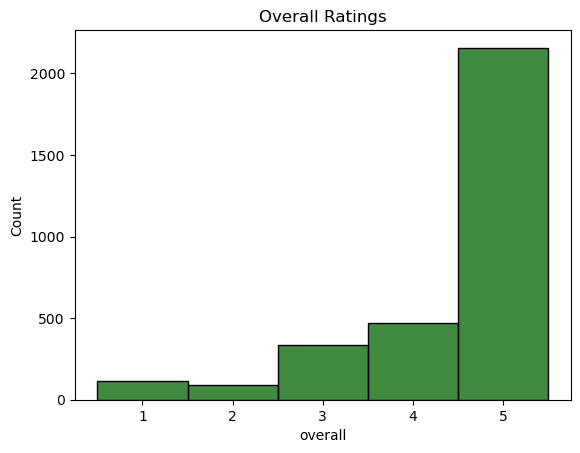

In [17]:
# Create a histogram of the overall rating
sns.histplot(df, x='overall', discrete=True, color='darkgreen')
plt.title('Overall Ratings');

In [18]:
df.drop(['reviewText','summary'],axis=1,inplace=True)

In [19]:
df.head()

,overall,filteredText
0,5,great product price
1,5,great product price
2,5,great product price
3,5,great product price
4,5,great product price


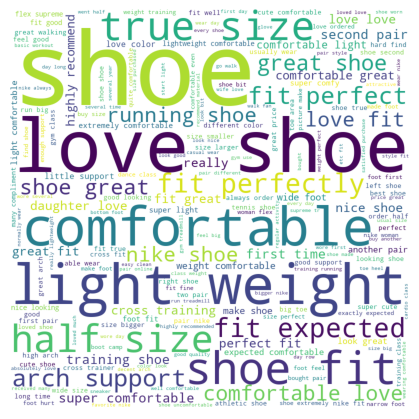

In [20]:
# Create a WordCloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # to create a Word Cloud
from PIL import Image # Pillow with WordCloud to image manipulation

# Create stopword list:
stopwords = set(STOPWORDS)

# # Perform tokenization
comments = ''
for word in df.filteredText:
    tokens = nltk.word_tokenize(word)
    comments += ' '.join(tokens) + ' ' 
    

# joined_text = " ".join(review for review in df.filteredText) 

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = stopwords,min_font_size = 10).generate(comments)

# plot the WordCloud image
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
# # plt.savefig('wordcloud11.png')
plt.show()

### Vocabulary Size and Tokenization

The vocabulary size is the number of unique words used in the dataset. Keras Tokenizer method creates a dictionary based on word frequency, where low numbers represent higher frequency words. The length of this dictionary represents the number of unique words in the corpus or data frame.

In [21]:
# Identify Vocabulary size (number of unique words)
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['filteredText'])
vocabulary = tokenizer.word_index # or word_counts
vocabulary_size = len(vocabulary)
print('Number of reviews:', tokenizer.document_count)
print('Vocabulary size:', vocabulary_size+1)

Number of reviews: 3176
Vocabulary size: 1248


### Word embedding length

Embedding is a dense vector floating point representation of the words in NLP, specified by weight. The representation vectors encode words closer in the vector space with similar meaning. Word embedding length is the positional distance of the word from the beginning of the vector. Word embedding length is determined by taking the fourth root of the vocabulary size.

In [22]:
# Word embedding length (fourth root of vocabulary size is used as max embedding)
embedding_size = int(round(np.sqrt((np.sqrt(vocabulary_size)))))
print('Embedding size:',embedding_size)

Embedding size: 6


### Justification of chosen maximum sequence length

The words are vectorized in NLP. The sequence length is the length of the longest sentence in the input data. The maximum sequence can be used to preserve most of the information during data input. The shorter sequences are then padded with 0s at the beginning or at the end of the sequence to make all sequences an even length. I used the longest sentence as the maximum sentence length and pre-padded the shorter sentences.

In [23]:
# Calculating the maximum amount of words in filteredReviews
word_length = []
for review in df['filteredText']:
    word_length.append(len(review.split(' ')))
print('Maximum words:',max(word_length),', Minimum words:', min(word_length),
      ', Average words:', round(np.mean(word_length)))

Maximum words: 118 , Minimum words: 1 , Average words: 12


In [24]:
# Maximum words 
max_length = max(word_length)

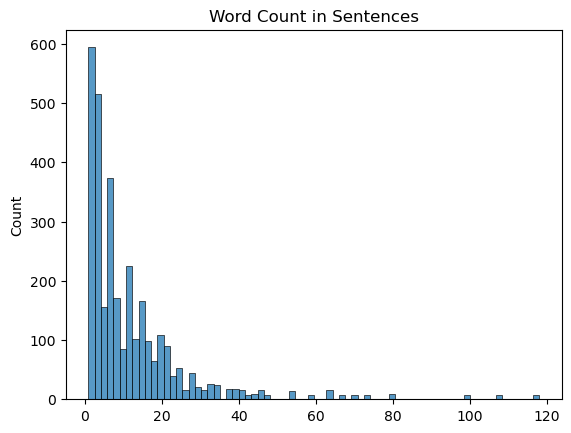

In [25]:
sns.histplot(word_length)
plt.title('Word Count in Sentences');

## Goal Of Tokenization Process

Tokenization is the process of separating strings. These tokens can be processed further by being replaced, formatted, and lemmatized. Tokenization is also used to count words, documents, and characters, add indexes, as well as prepare sequences to be padded, truncated, or masked to unify sequences. 

## Padding Process

Padding is a necessary technique in Neural Networks to preserve the matrix dimensions for the input data. It is implemented before or after sequences, adding 0s to fill the necessary gaps to reach the maximum sequence length so that all sequences have equal lengths in the tensor.

Below is the code for `pre-sequence padding`.

In [26]:
#import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#using the <LOV> to tokenize the unknown words i.e. the words, which are not in the vocabulary, will be 
#represented as <LOV> in the word_index

tokenizer = Tokenizer(oov_token='<LOV>')
tokenizer.fit_on_texts(df['filteredText'])
sequences = tokenizer.texts_to_sequences(df['filteredText'])

# Padding pre-sequence
padded = pad_sequences(sequences, padding='pre',maxlen=max_length) 
print(padded[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   7 107 105]


In [27]:
print(padded.shape)

(3176, 118)


In [28]:
print(sequences[:10])

[[7, 107, 105], [7, 107, 105], [7, 107, 105], [7, 107, 105], [7, 107, 105], [1148, 108, 35, 1200, 1149], [527, 528, 109, 1145], [527, 528, 109, 1145], [1074, 20, 10, 124, 43, 542], [1148, 108, 35, 1201, 1149]]


## Identifying Categories of Sentiment

I kept 2 categories of sentiment: Negative=0, and Positive=1. For the final dense layer of the network, I used the `'sigmoid'` activation function to calculate the relative probabilities of the binary outcome.

In [29]:
# Categorize sentiment based on overall rating as positive or negative, and eliminate neutral from sentiment
df = df[df['overall']!= 3]
def sentiment(rating):
    if rating > 3:
        sentiments = 'positive'
    else:
        sentiments = 'negative'
    return sentiments

df['sentiment'] = df['overall'].apply(sentiment)

df['sentiment'].value_counts()

positive    2629
negative     210
Name: sentiment, dtype: int64

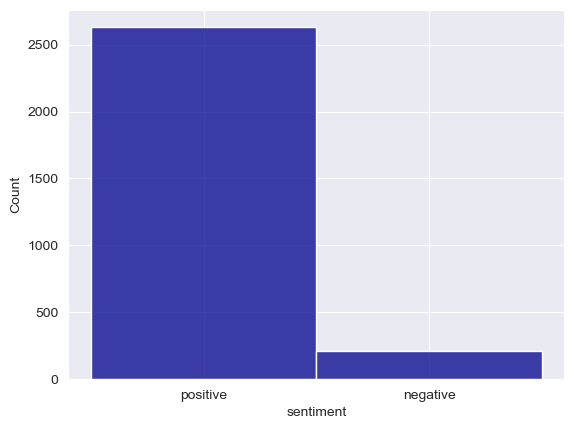

In [30]:
# Plot sentiments based on overall rating
sns.set_style("darkgrid")
sns.histplot(df, x='sentiment',discrete=True, color='darkblue');

In [31]:
# Label 0=negative, 1=positive sentiment
df['sentiment_label'] = df['sentiment'].apply(lambda sentiment : 1 if sentiment == 'positive' else 0 )
df.sample(5)

,overall,filteredText,sentiment,sentiment_label
117,5,love em plain frill pocket heavy good ol sweatpants,positive,1
2542,5,great shoe,positive,1
1926,5,sneaker give motivation workout feel good great training,positive,1
2533,5,quick tranasaction loved shoe would purchase,positive,1
2001,5,second pair comfortable great people bunion issue previous surgery sole wear great,positive,1


In [32]:
# Train,Test,Validation Split for Tensorflow 

from sklearn.model_selection import train_test_split

x = df['filteredText']
y = df['sentiment_label']

# X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2) #, random_state=42, stratify=y

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.9)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9)

tokenizer = Tokenizer(oov_token='<LOV>')
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)
valid_sequences = tokenizer.texts_to_sequences(X_valid)

padded_train = pad_sequences(train_sequences, padding='pre',maxlen=max_length) 
padded_test = pad_sequences(test_sequences, padding='pre',maxlen=max_length)
padded_valid = pad_sequences(valid_sequences, padding='pre',maxlen=max_length) 

In [33]:
x.shape

(2839,)

In [34]:
print(padded_train.shape)
print(padded_test.shape)
print(padded_valid.shape)
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(2299, 118)
(284, 118)
(256, 118)
(2299,)
(284,)
(256,)


In [35]:
# Save train and test data as dataframes into csv files

pd.DataFrame(padded_train).to_csv('Padded_X_training.csv')
pd.DataFrame(padded_test).to_csv('Padded_X_testing.csv')
pd.DataFrame(padded_valid).to_csv('Padded_X_validation.csv')
pd.DataFrame(y_train).to_csv('Sentiment_y_training.csv')
pd.DataFrame(y_test).to_csv('Sentiment_y_testing.csv')
pd.DataFrame(y_valid).to_csv('Sentiment_y_validation.csv')

# Network Architecture

## Model Summary

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
embedding_vector_length = 6
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocabulary_size, embedding_vector_length, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 118, 6)            7482      
                                                                 
 global_average_pooling1d (G  (None, 6)                0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 100)               700       
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 13,283
Trainable params: 13,283
Non-trainable params: 0
____________________________________________________

In [39]:
# What are model's layers
model.layers

## Number of layers, type of layers, and total number of parameters

"Artificial neural networks have two main hyperparameters that control the architecture or topology of the network: the number of layers and the number of nodes in each hidden layer". The input layer of input variables will eventually lead to the output layer which produces the output variables with one or more hidden layers in between. The number of nodes in layers determines the width, and the number of layers determines the depth of the neural network.

**There are 5 layers in the model:**

- 1st layer- Core type: Embedding / Layer type: Input
- 2nd layer- Core type: Pooling / Layer type: GlobalAveragePooling1D 
- 3rd layer- Core type: Dense / Layer type: Hidden
- 4th layer- Core type: Dense / Layer type: Hidden
- 5th layer- Core type: Dense / Layer type: Output

**Total number of parameters =** 13283<br>
i, input size<br>
h, size of hidden layer<br>
o, output size

num_params = connections between layers + biases in every layer (StackExchange, 2019)$^9$ <br>
= (i×h) + (h×o) + (h+o) + bias<br>
= (1247x6)+(6x0)+(6x100)+(100x50)+(50x1) + biases(100+50+1)
= 13283

In [40]:
# How many parameters are trainable
model.count_params()

13283

In [41]:
# model.weights

In [42]:
# Callbacks and number of epochs declared 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
history = model.fit(padded_train, y_train, validation_split=0.1, batch_size=16, epochs=12, callbacks=[es],
                    shuffle=True) #  

Epoch 1/12
130/130 [==============================] - 2s 4ms/step - loss: 0.3798 - accuracy: 0.9217 - val_loss: 0.2608 - val_accuracy: 0.9261
Epoch 2/12
130/130 [==============================] - 0s 3ms/step - loss: 0.2498 - accuracy: 0.9294 - val_loss: 0.2558 - val_accuracy: 0.9261
Epoch 3/12
130/130 [==============================] - 0s 3ms/step - loss: 0.2433 - accuracy: 0.9294 - val_loss: 0.2478 - val_accuracy: 0.9261
Epoch 4/12
130/130 [==============================] - 0s 3ms/step - loss: 0.2314 - accuracy: 0.9294 - val_loss: 0.2329 - val_accuracy: 0.9261
Epoch 5/12
130/130 [==============================] - 0s 3ms/step - loss: 0.2028 - accuracy: 0.9294 - val_loss: 0.1916 - val_accuracy: 0.9261
Epoch 6/12
130/130 [==============================] - 0s 2ms/step - loss: 0.1302 - accuracy: 0.9454 - val_loss: 0.0983 - val_accuracy: 0.9652
Epoch 7/12
130/130 [==============================] - 0s 3ms/step - loss: 0.0615 - accuracy: 0.9778 - val_loss: 0.0563 - val_accuracy: 0.9870
Epoch 

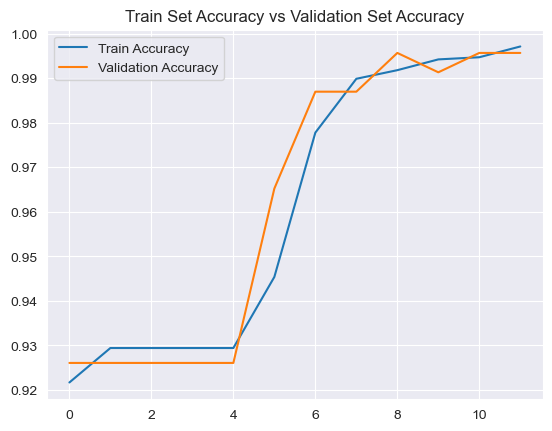

In [43]:
# Plot of train set loss vs validation set loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train Set Accuracy vs Validation Set Accuracy')
plt.show()

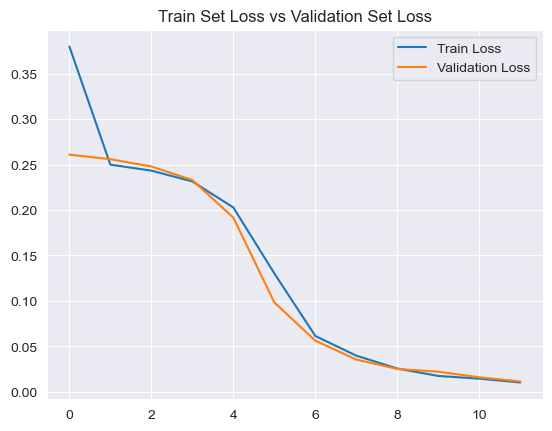

In [44]:
# Plot of train set loss vs validation set loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Train Set Loss vs Validation Set Loss')
plt.show()

## Visualizations of the model's training process

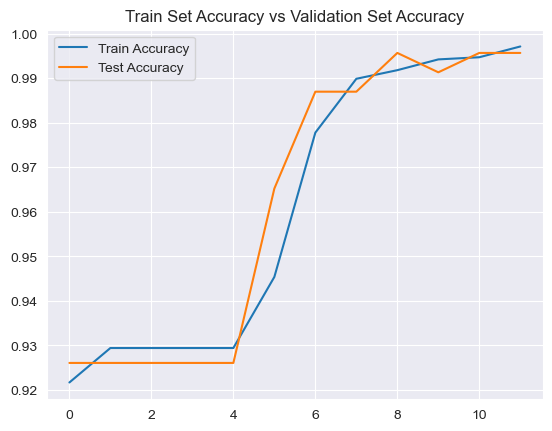

In [45]:
# Plot of train set accuracy vs validation set accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Train Set Accuracy vs Validation Set Accuracy')
plt.show()

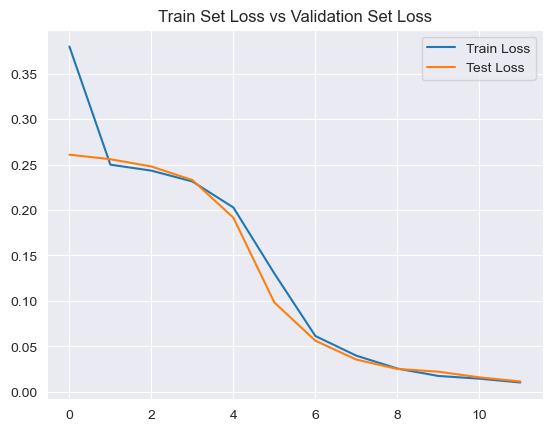

In [46]:
# Plot of train set loss vs validation set loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Train Set Loss vs Validation Set Loss')
plt.show()

## Predictive Accuracy of the trained network

In [47]:
# Model accuracy and loss for validation set
model.evaluate(padded_valid, y_valid)

8/8 [==============================] - 0s 2ms/step - loss: 0.0261 - accuracy: 0.9922


[0.02613762393593788, 0.9921875]

In [48]:
predictions = model.predict(padded_valid,batch_size=17)

16/16 [==============================] - 0s 1ms/step


In [49]:
# Indexes of negative reviews in validation set
print(list(np.where(y_valid == 0)))

[array([  5,  11,  37,  45,  47,  61,  71,  72,  74,  89,  98, 117, 143,
       171, 176, 177, 189, 191, 199, 209, 211, 214, 233, 239, 242])]


In [50]:
# Indexes of positive reviews in validation set
print(list(np.where(y_valid == 1)))

[array([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  38,  39,  40,  41,
        42,  43,  44,  46,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        73,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  90,  91,  92,  93,  94,  95,  96,  97,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 172, 173, 174, 175, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 190, 192, 193, 194, 195, 196, 197, 1

In [51]:
# Test if model can accurately predict actual 'positive reviews'

i = 189

print('Review:', X_valid.iloc[i],'\n')
print('Actual:', 'Negative' if y_valid.iloc[i]==0 else 'Positive','review')

print('Predicted:', 'Positive' if predictions[i][0] >= 0.5 else 'Negative', 'review')

Review: tried one store bought online different kind shoe big different fit 

Actual: Negative review
Predicted: Negative review


In [52]:
# Test if model can accurately predict actual 'negative reviews'

i = 132

print('Review:', X_valid.iloc[i],'\n')
print('Actual:', 'Negative' if y_valid.iloc[i]==0 else 'Positive','review')

print('Predicted:', 'Positive' if predictions[i][0] >= 0.5 else 'Negative', 'review')

Review: perfect gym could use little support toe area comfortable light fit true size 

Actual: Positive review
Predicted: Positive review


## Save the trained network

In [53]:
model.save('keras_model_file.h5')